# Problem 1

### Getting familiar with loading, visualizing and operating on multivariate data

A Hess diagram is a 2D plot coded by a third quantity.

Here's an example from the [astroML documentation](https://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html) showing the temperature and surface gravity (how strongly the star would pull on you if you could stand on it's surface, including the effect of rotation), color coded on the left by density, and on the right by metallicity (measured here as the ratio of iron to hydrogen) with density contours.


<img src="https://www.astroml.org/_images/plot_SDSS_SSPP_1.png">

From http://das.sdss.org/va/stripe_82_variability/SDSS_82_public/, download eight HLC\*fits.gz files (and recall how you can use `astropy.io.fits` to load these)

The HLC files are each different bands on the sky.

For each HLC file, separate stars and galaxies by using the `MEAN_OBJECT_TYPE` column and making a cut with value > 5 to find stars.

For each HLC file, and separately for stars and galaxies make a 3-panel plot.

In the left plot show `r` vs `g-i` color coded by density (recall we did this with `seaborn`'s `jointplot`, but you can use whatever).

Estimate a bivariate distribution for `density(r, g-i)` this sample (recall we did with `seaborn`'s `jointplot` use `kde`, but you can use whatever).

In the middle and right panel, again plot `r` vs `g-i`, but now color-coded by proper motion in RA, and Dec. Overlay the density contors.

Comment on the structure in stars vs galaxies, and the evolution with position on the sky in each HLC.


HLC.RA_20_to_21.fits.gz: All
RA_PM has mean:-0.00114, and std:0.02619
DEC_PM has mean:-0.00533, and std:0.02647


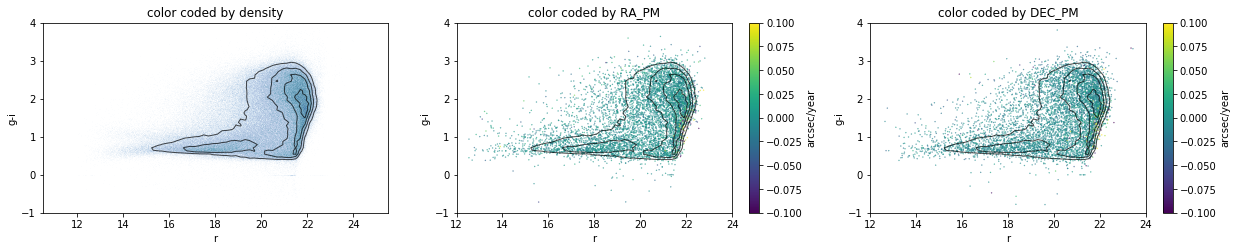

HLC.RA_20_to_21.fits.gz: Star
RA_PM has mean:-0.00120, and std:0.01778
DEC_PM has mean:-0.00629, and std:0.01735


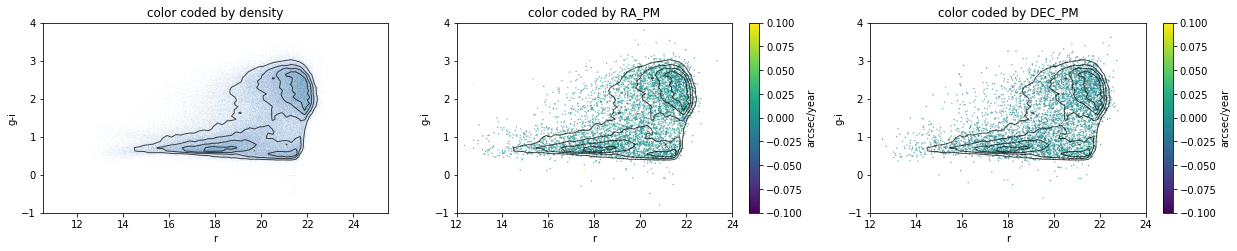

HLC.RA_20_to_21.fits.gz: Galaxy
RA_PM has mean:-0.00085, and std:0.04749
DEC_PM has mean:-0.00126, and std:0.04874


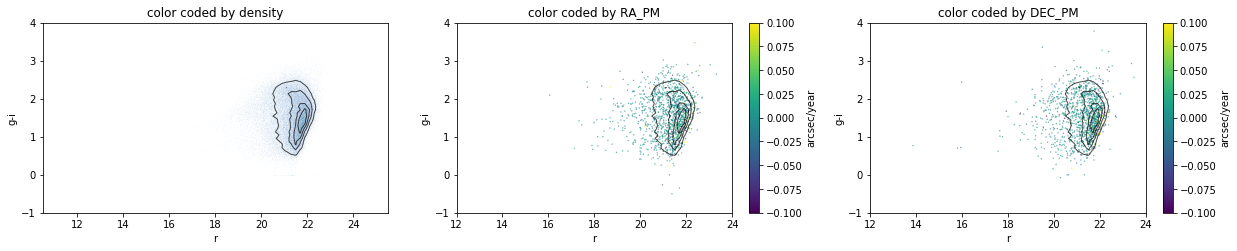

HLC.RA_21_to_22.fits.gz: All
RA_PM has mean:0.00167, and std:0.03287
DEC_PM has mean:-0.00532, and std:0.03240


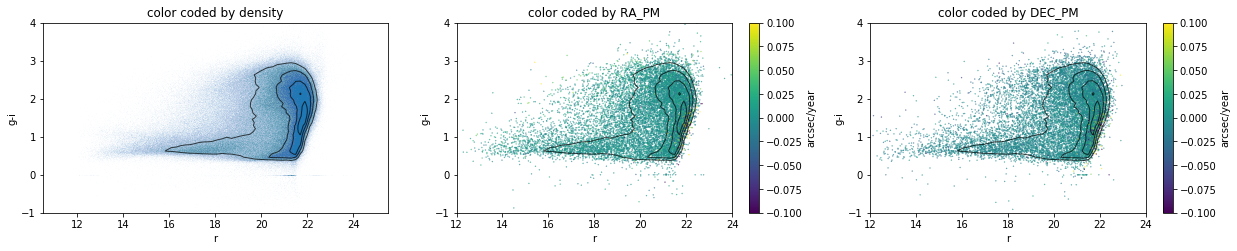

HLC.RA_21_to_22.fits.gz: Star
RA_PM has mean:0.00205, and std:0.01990
DEC_PM has mean:-0.00713, and std:0.01914


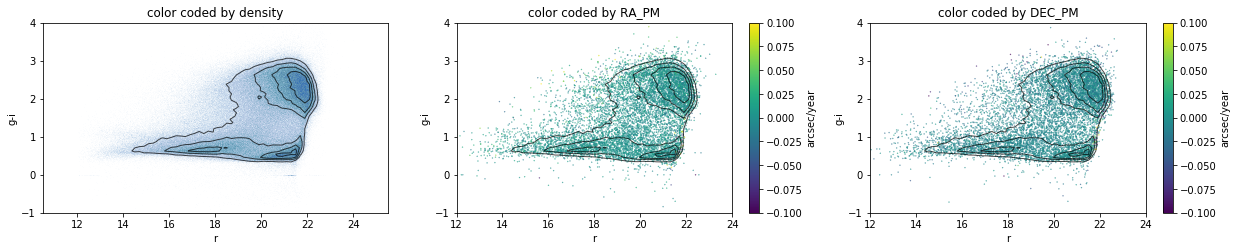

HLC.RA_21_to_22.fits.gz: Galaxy
RA_PM has mean:0.00076, and std:0.05205
DEC_PM has mean:-0.00103, and std:0.05150


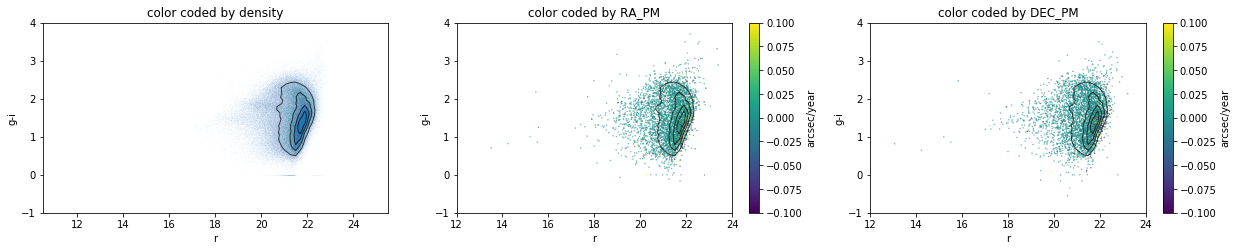

HLC.RA_22_to_23.fits.gz: All
RA_PM has mean:0.00191, and std:0.03437
DEC_PM has mean:-0.00435, and std:0.03408


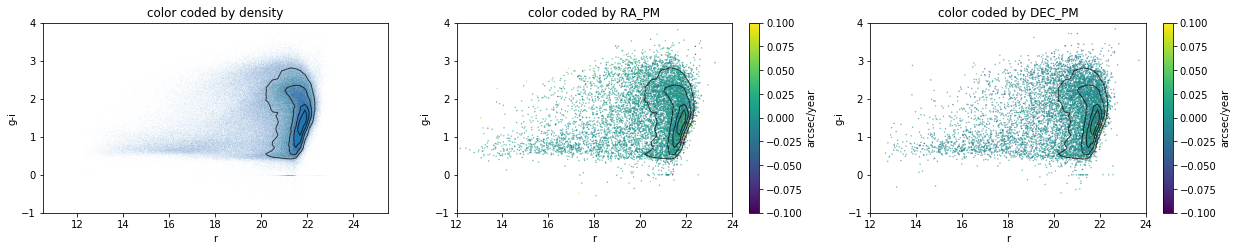

HLC.RA_22_to_23.fits.gz: Star
RA_PM has mean:0.00305, and std:0.02054
DEC_PM has mean:-0.00758, and std:0.01944


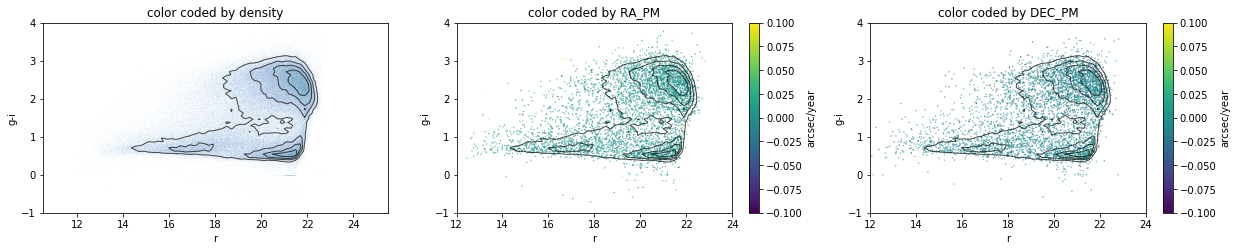

HLC.RA_22_to_23.fits.gz: Galaxy
RA_PM has mean:0.00056, and std:0.04557
DEC_PM has mean:-0.00053, and std:0.04541


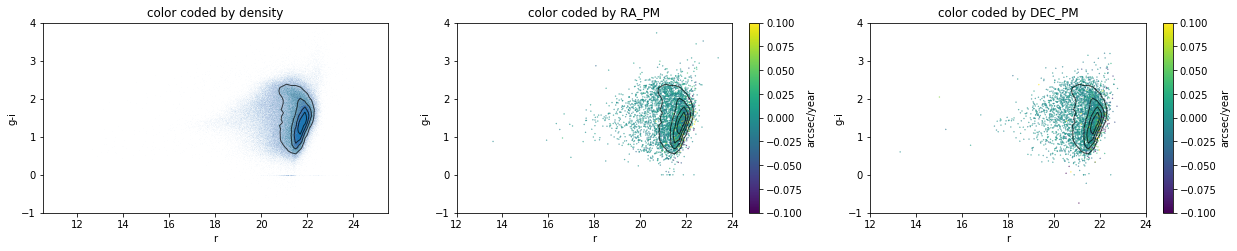

HLC.RA_23_to_24.fits.gz: All
RA_PM has mean:0.00235, and std:0.03606
DEC_PM has mean:-0.00360, and std:0.03565


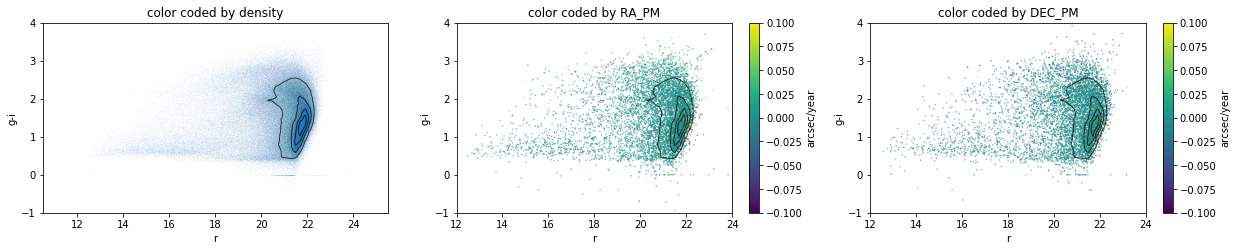

HLC.RA_23_to_24.fits.gz: Star
RA_PM has mean:0.00519, and std:0.02292
DEC_PM has mean:-0.00791, and std:0.02157


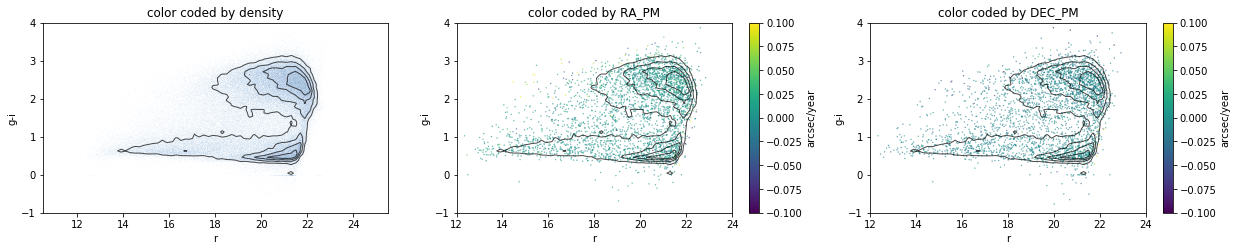

HLC.RA_23_to_24.fits.gz: Galaxy
RA_PM has mean:0.00025, and std:0.04315
DEC_PM has mean:-0.00041, and std:0.04292


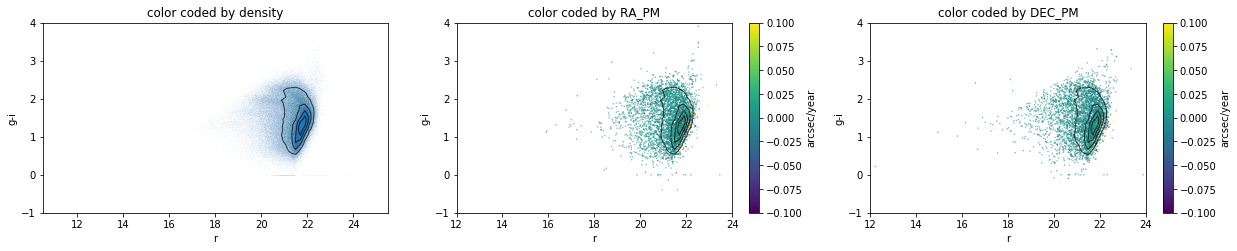

HLC.RA_00_to_01.fits.gz: All
RA_PM has mean:0.00241, and std:0.03939
DEC_PM has mean:-0.00287, and std:0.03893


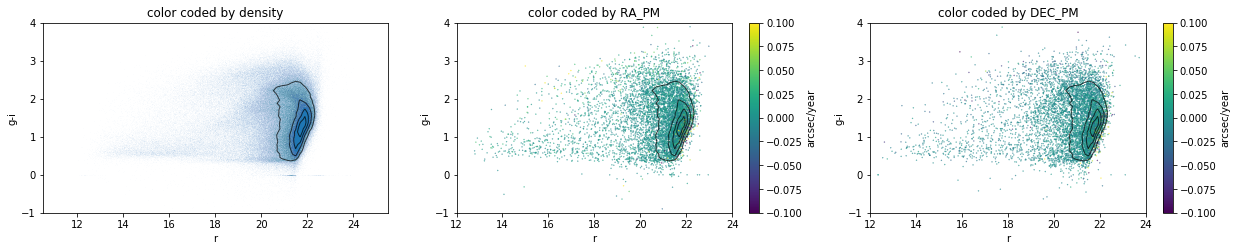

HLC.RA_00_to_01.fits.gz: Star
RA_PM has mean:0.00623, and std:0.02523
DEC_PM has mean:-0.00781, and std:0.02413


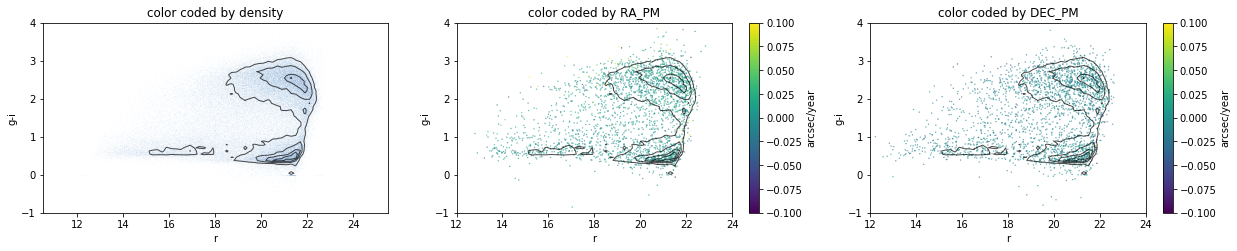

HLC.RA_00_to_01.fits.gz: Galaxy
RA_PM has mean:0.00036, and std:0.04504
DEC_PM has mean:-0.00022, and std:0.04466


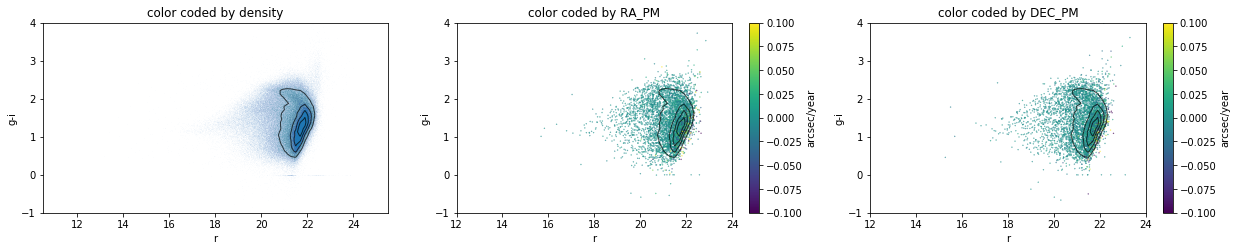

HLC.RA_01_to_02.fits.gz: All
RA_PM has mean:0.00230, and std:0.03757
DEC_PM has mean:-0.00300, and std:0.03693


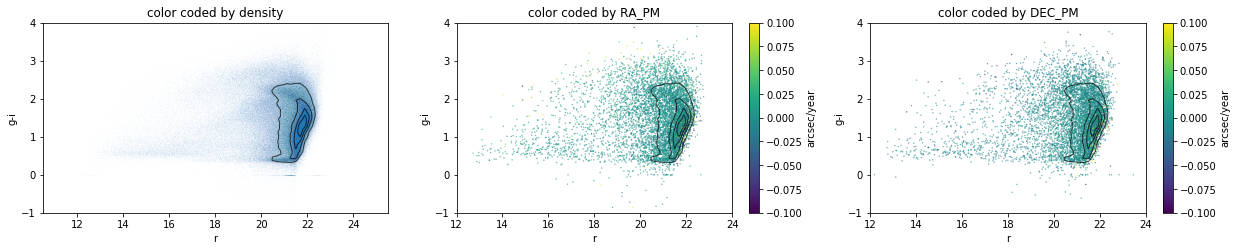

HLC.RA_01_to_02.fits.gz: Star
RA_PM has mean:0.00643, and std:0.02625
DEC_PM has mean:-0.00780, and std:0.02303


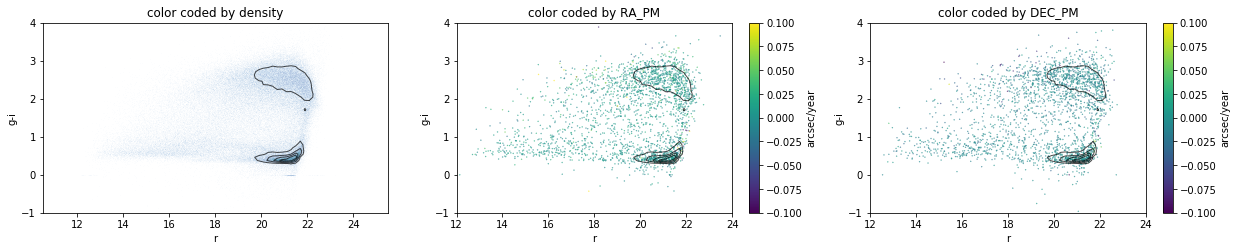

HLC.RA_01_to_02.fits.gz: Galaxy
RA_PM has mean:0.00009, and std:0.04224
DEC_PM has mean:-0.00043, and std:0.04231


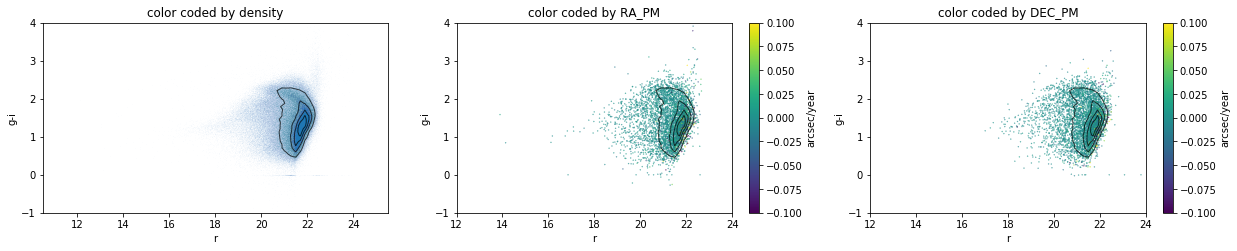

HLC.RA_02_to_03.fits.gz: All
RA_PM has mean:0.00246, and std:0.03789
DEC_PM has mean:-0.00285, and std:0.03765


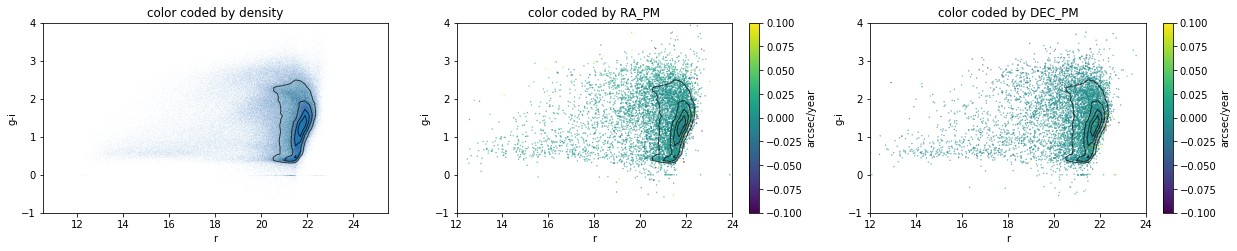

HLC.RA_02_to_03.fits.gz: Star
RA_PM has mean:0.00610, and std:0.02470
DEC_PM has mean:-0.00684, and std:0.02308


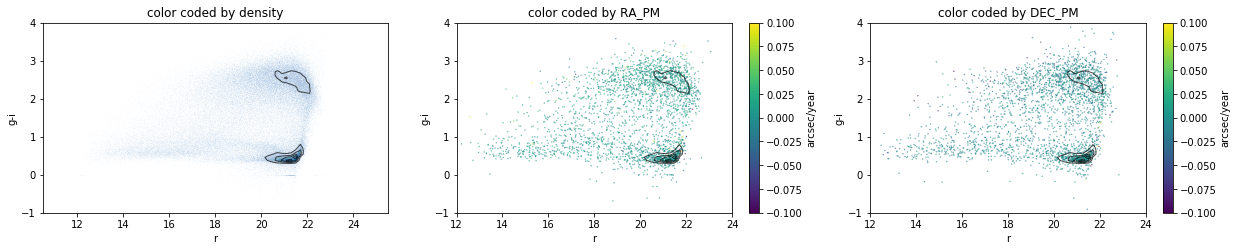

HLC.RA_02_to_03.fits.gz: Galaxy
RA_PM has mean:0.00021, and std:0.04394
DEC_PM has mean:-0.00039, and std:0.04412


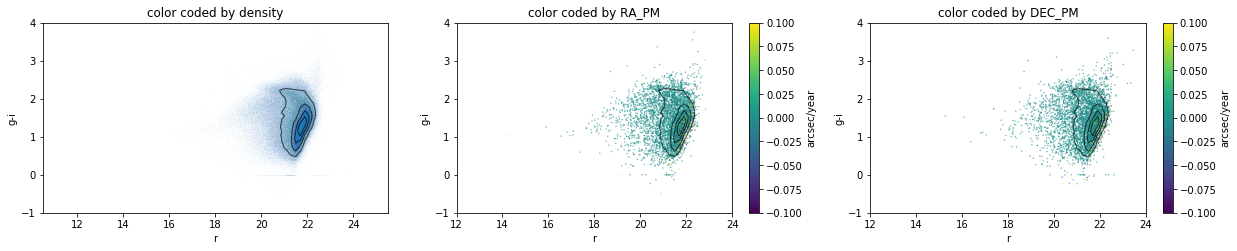

HLC.RA_03_to_04.fits.gz: All
RA_PM has mean:0.00262, and std:0.03798
DEC_PM has mean:-0.00330, and std:0.03861


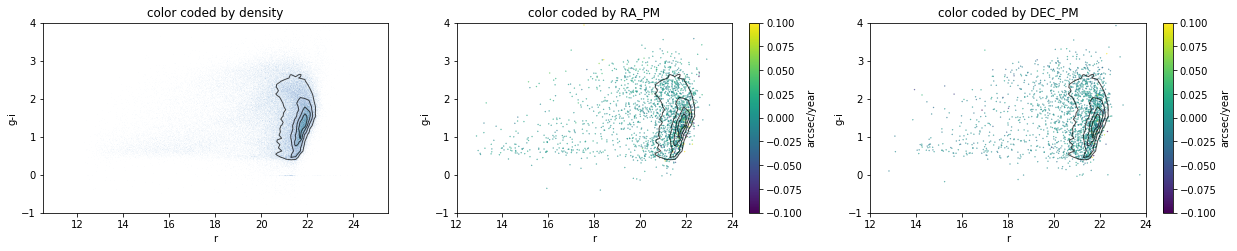

HLC.RA_03_to_04.fits.gz: Star
RA_PM has mean:0.00618, and std:0.02136
DEC_PM has mean:-0.00680, and std:0.02072


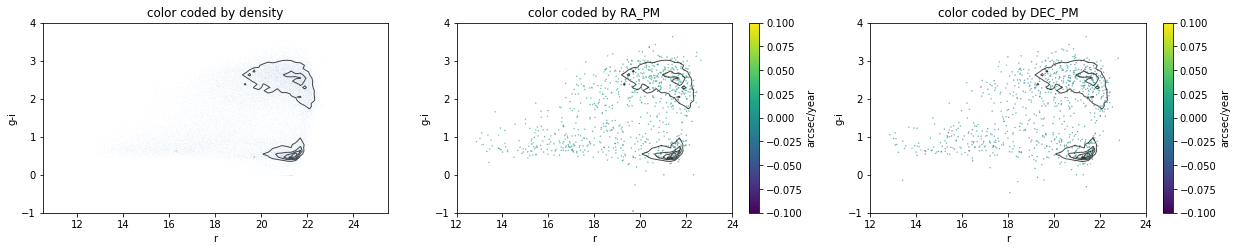

HLC.RA_03_to_04.fits.gz: Galaxy
RA_PM has mean:0.00010, and std:0.04612
DEC_PM has mean:-0.00082, and std:0.04721


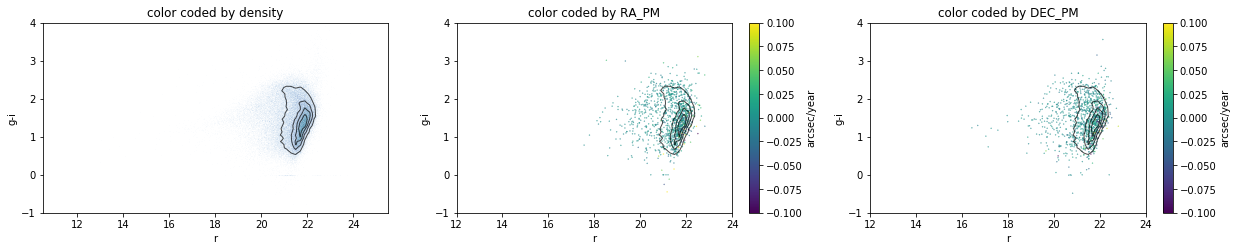

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.io.fits as afits
import seaborn as sns

files = ['HLC.RA_20_to_21.fits.gz','HLC.RA_21_to_22.fits.gz','HLC.RA_22_to_23.fits.gz','HLC.RA_23_to_24.fits.gz',\
         'HLC.RA_00_to_01.fits.gz','HLC.RA_01_to_02.fits.gz','HLC.RA_02_to_03.fits.gz','HLC.RA_03_to_04.fits.gz']

def plots(name,tag,data,fig,ax):
    xlim = (12,24)
    ylim = (-1,4)
    g = data['MEAN_PSFMAG'][:,1]
    r = data['MEAN_PSFMAG'][:,2]
    i = data['MEAN_PSFMAG'][:,3]
    MOT = data['MEAN_OBJECT_TYPE']  
    if (tag == 'Star'):
        split = MOT>5
    elif (tag == 'Galaxy'):
        split = MOT<=5
    else:
        split = MOT>0
        
    toPlot = (r>=xlim[0])&(r<=xlim[1])&((g-i)>=ylim[0])&((g-i)<=xlim[1])&split
    x = r[toPlot]
    y = (g-i)[toPlot]
    
    if (name == 'density'):
        ax.scatter(x,y,s=0.1,alpha = 0.02)
        ax.set_xlim((10.5,25.5))
    else:
        z=data[name][toPlot]
        select = np.absolute(z)<=1
        x = x[select]
        y = y[select]
        z = z[select]
        print(f'{name} has mean:{z.mean():.5f}, and std:{z.std():.5f}')
        RA = ax.scatter(x[::50],y[::50],c=z[::50],s=0.1,cmap='viridis',vmin=-0.1,vmax=0.1)  
        cbar = fig.colorbar(RA,ax=ax)
        cbar.ax.set_ylabel('arcsec/year')
        ax.set_xlim(xlim)

    ax.set_ylim(ylim)    
    ax.set_title(f'color coded by {name}')
    ax.set_xlabel(f'r')
    ax.set_ylabel(f'g-i')   
    dist = np.histogram2d(x,y,bins=60,range=[xlim,ylim])
    Z = dist[0].T/dist[0].max()
    X = [(dist[1][i+1]+dist[1][i])/2 for i in range(len(dist[1])-1)]
    Y = [(dist[2][i+1]+dist[2][i])/2 for i in range(len(dist[2])-1)]
    X,Y = np.meshgrid(X,Y)
    ax.contour(X,Y,Z,np.linspace(0.2,1.0,5),colors='k',alpha=0.7,linewidths=1) 
    return

for file in files:    
    title = file
    filename = f'/Users/tsunghan/Downloads/{file}'
    load = afits.open(filename)
    data=load[1].data
    
    tags = ['All','Star','Galaxy']  
    for tag in tags:
        print(f'{file}: {tag}')
        fig = plt.figure(figsize=(21,3.5))
        ax1 = fig.add_subplot(131)
        ax2 = fig.add_subplot(132)
        ax3 = fig.add_subplot(133)
        plots('density',tag,data,fig,ax1)
        plots('RA_PM',tag,data,fig,ax2)
        plots('DEC_PM',tag,data,fig,ax3)
        plt.show()
        
    load.close()

We see from the figures that stars roughly have two populations: one has bigger g-i color index and slightly larger r value than the other group. Interestingly, the galaxies have only one population and it seems lying between the two star populations on the r vs g-i plots. For the proper motion in RA and DEC, it looks like the majority of the objects have values very close to 0 (with respect to the color scale presented) despite few outliers.

As we look the plots following the position label on the sky from RA_20 to RA_04, we see relatively more stars at the beginning and then galaxies dominate the data at the end. The intensity of density plots (based on the actual number of data points) indicate that we see fewer objects as we move across RA bands. Moreover, the star population with higher g-i index appears subdominant to the low g-i index group in the last three RA bands, compared the first three bands.

Finally, stars tend to have larger (mean) proper motion in RA and DEC than galaxies do, but galaxies generally have larger dispersion (maybe due to the accuracy of angular velocity measurement for distant objects). Because galaxies lie in the background universe but 'stars' here are all foreground stars living in the Milky Way, it is expected that galaxies appear basically stationary while stars tend to move fast with some angular velocities (due to relative motion between our solar system and other stars).

# Problem 2

### Comparing distributions to a standard normal distribution

Load the `IntroStat_demo.csv` file in the data directory (use `pandas` or `astropy` or whatever you like).

Estimate the sample mean and variance of the suspiciously named `mag.outlier` column.

Make a Q-Q plot of the `mag.outlier` column and over plot a line with `Y = Mean + Sigma*X` on it. 

Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)

Overplot that line passing through the data.

Now try the same thing with `mag.het`. Describe what you found?

What happens if you rescale the data? Subtract of the sample mean of `mag.het` and divide by `mag.het.error`. Now repeat the Q-Q plot with this quantity. 

Describe what's going on.

Column Name: mag.outlier
Sample Mean     = 18.561082466856572
Sample variance = 0.005150698425781881
Sample std      = 0.0717683664700673
First quartile value: 18.5373952724961
Third quartile value: 18.56298225840465


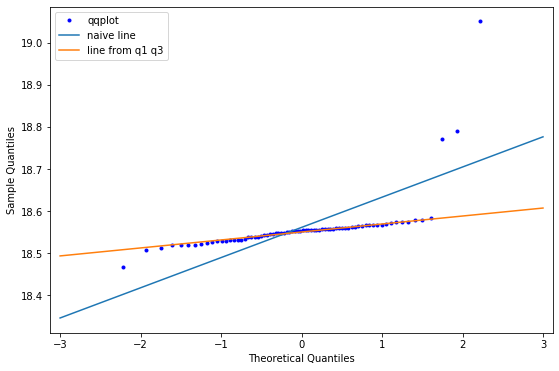

Column Name: mag.het
Sample Mean     = 18.548341155926813
Sample variance = 0.0020798782042571124
Sample std      = 0.04560568171025527
First quartile value: 18.5292093668539
Third quartile value: 18.570569962457924


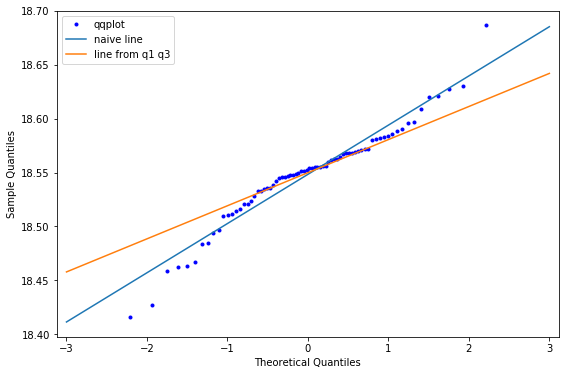

Column Name: mag.het but Rescaled
Sample Mean     = 0.11479798948878467
Sample variance = 0.8348272237176363
Sample std      = 0.913688800258401
First quartile value: -0.5510125887859657
Third quartile value: 0.6573012075923795


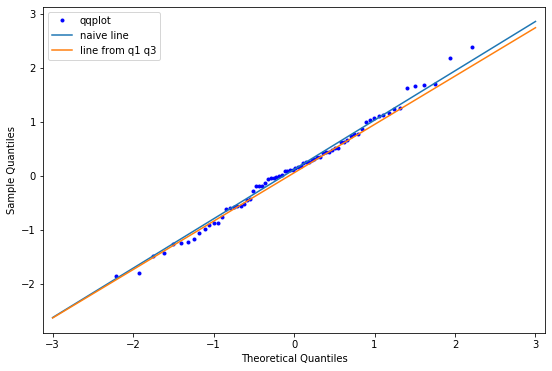

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import pandas as pd

data2 = pd.read_csv('../../data/01/IntroStat_demo.csv')

def q2(df):
    mean = df.mean()
    std = df.std()
    var = df.var()
    
    print(f'Column Name: {col}\nSample Mean     = {mean}\nSample variance = {var}\nSample std      = {std}')

    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111)

    X = np.linspace(-3,3)
    Y = mean + std*X

    Y_q = df.quantile(q=[0.25,0.75])
    print(f'First quartile value: {Y_q[0.25]}')
    print(f'Third quartile value: {Y_q[0.75]}')
    m = (Y_q[0.75] - Y_q[0.25])/(st.norm.ppf(0.75)-st.norm.ppf(0.25))
    Y_q = (Y_q[0.75] + Y_q[0.25])/2 + m*X

    sm.qqplot(df,ax=ax,marker='.',label='qqplot')
    ax.plot(X,Y,label='naive line')
    ax.plot(X,Y_q,label='line from q1 q3')

    ax.legend()
    plt.show()       
    return

columns = ['mag.outlier','mag.het']
for col in columns: 
    q2(data2[col])
    
mean = data2['mag.het'].mean()
df = (data2['mag.het']-mean)/data2['mag.het.error']
col = col+' but Rescaled'
q2(df)

On the qqplot for mag.outlier, we see that the naive fitting line scaled by sigma mismatch the points due to the outliers at the tails. The new line fit through the first and third quartile looks better, because it passes through must of the points. Therefore, we can draw a normal distribution based on this new line to approximate the data except the outliers.

The qqplot of mag.het mildly shows the same problem because it has less divergent outliers (compared with those of mag.outlier). After rescaling, the new plot indicates that the rescaled data can be well approximated by a normal distribution because all the fitted lines pass through almost all points.

# Problem 3

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.


Split the data into LMC and SMC, and then again by mode F and 1, and plot the `W` on the y-axis vs `log(P1)` on x.
Fit or estimate straight lines to each of the four samples (you can use `statsmodels` `astropy` `scipy` `numpy`....)
(Yes, we've not covered fitting straight lines. That's OK.)

Compute the residuals of each sample to it's respective line. Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

Plot the residuals color coded by if they are positive or negative vs RA and Dec (just like a Hess diagram in Problem 1).

Finally, plot the residuals against the fitted `W` values, and just to anticipate the next homework assignment, also plot `log(P1) vs V-I`. Comment on what you are seeing.

Cloud:LMC; Mode:F


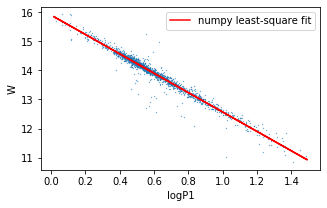

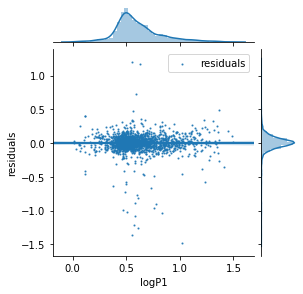

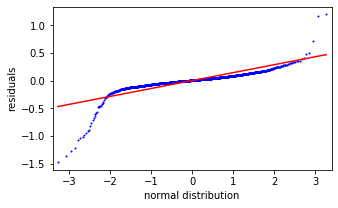

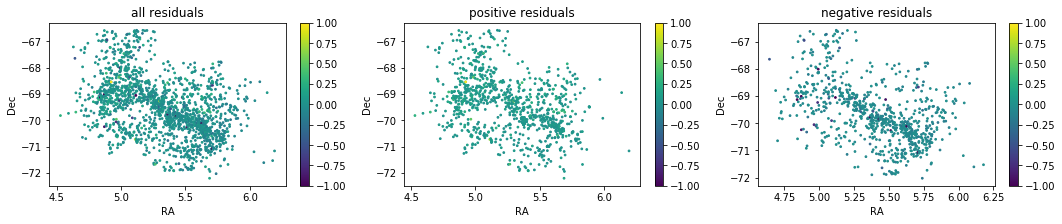

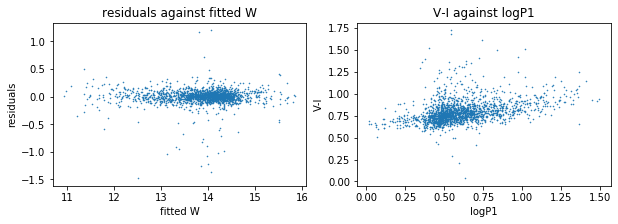

Cloud:LMC; Mode:1


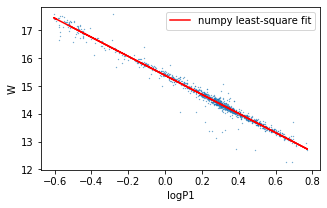

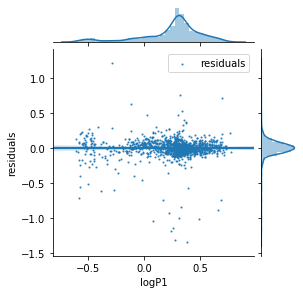

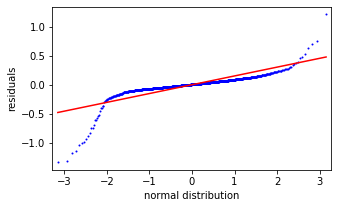

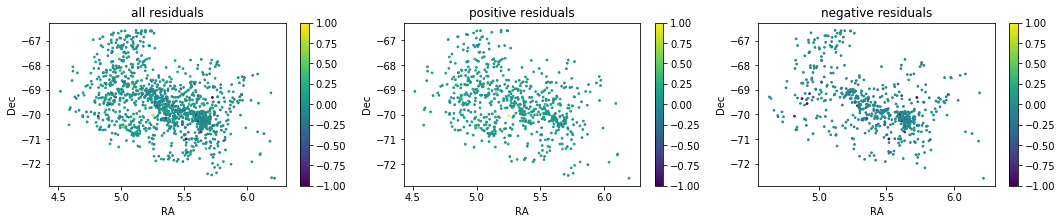

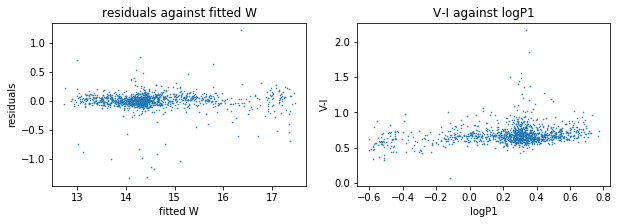

Cloud:SMC; Mode:F


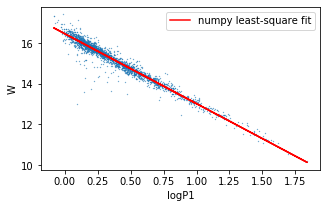

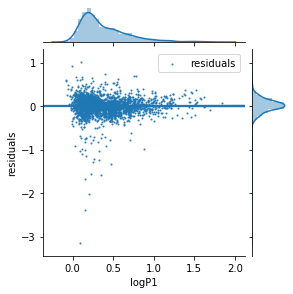

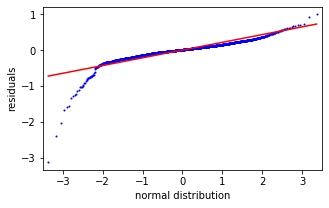

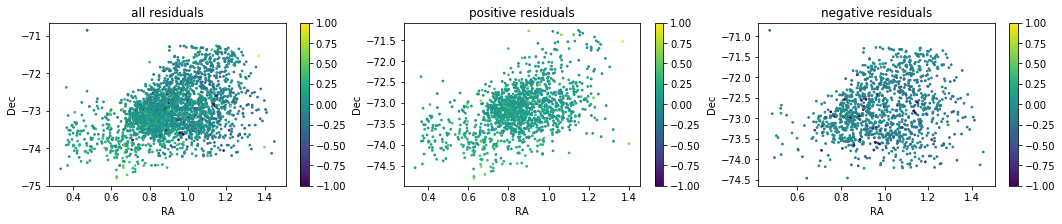

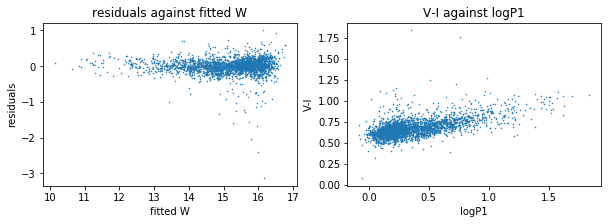

Cloud:SMC; Mode:1


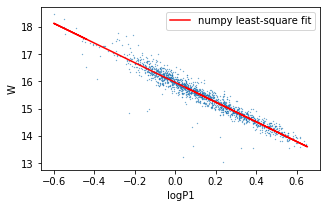

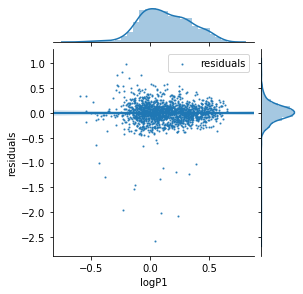

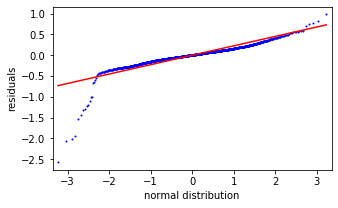

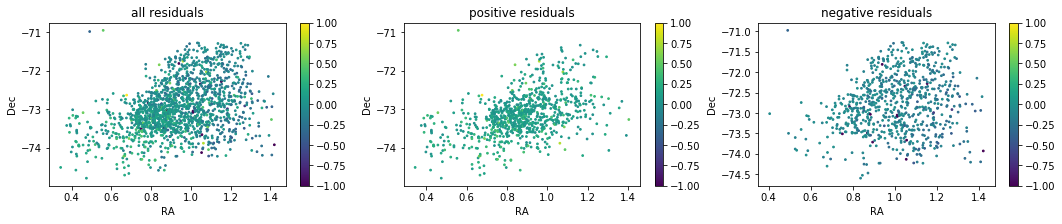

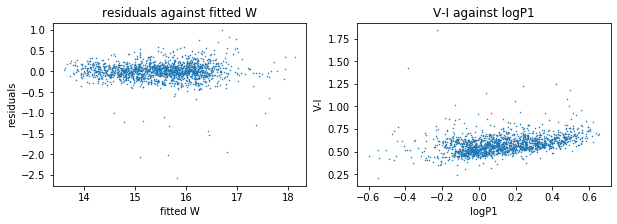

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import pandas as pd
import seaborn as sns

data3 = pd.read_csv('../../data/01/Cepheids.csv')

def q3(data,cloud,mode):  
    data = data[data['Cloud'] == cloud]
    data = data[data['Mode'] == mode]
    
    fig1 = plt.figure(figsize=(5, 3))
    ax = fig1.add_subplot(111)
    
    x = np.array(data['logP1'])
    y = np.array(data['W'])
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    
    ax.scatter(x,y,marker='.',s=0.3)
    ax.plot(x, m*x + c, 'r', label='numpy least-square fit')
    ax.set_xlabel('logP1')
    ax.set_ylabel('W')
    ax.legend()

    fit = m*x + c
    res = y - fit
    sns.jointplot(x=x,y=res,kind='reg',label='residuals',marker='.',scatter_kws={'s' : 5},height=4)
    plt.xlabel('logP1')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()

    fig2 = plt.figure(figsize=(5, 3))
    ax21 = fig2.add_subplot(111)  
    sm.qqplot(res,line='s',ax=ax21,markersize=1)
    ax21.set_xlabel('normal distribution')
    ax21.set_ylabel('residuals')  
    plt.show()
    
    fig3 = plt.figure(figsize=(18, 3))
    ax31 = fig3.add_subplot(131) 
    ax32 = fig3.add_subplot(132)
    ax33 = fig3.add_subplot(133)
    x = np.array(data['RA0'])
    y = np.array(data['Decl0'])
    RD = ax31.scatter(x,y,c=res,s=3,cmap='viridis',vmin=-1,vmax=1)  
    fig.colorbar(RD,ax=ax31)
    ax31.set_xlabel('RA')
    ax31.set_ylabel('Dec')
    ax31.set_title(f'all residuals')    
    RD = ax32.scatter(x[res>0],y[res>0],c=res[res>0],s=3,cmap='viridis',vmin=-1,vmax=1)  
    fig.colorbar(RD,ax=ax32)
    ax32.set_xlabel('RA')
    ax32.set_ylabel('Dec')
    ax32.set_title(f'positive residuals')
    RD = ax33.scatter(x[res<0],y[res<0],c=res[res<0],s=3,cmap='viridis',vmin=-1,vmax=1)  
    fig.colorbar(RD,ax=ax33)
    ax33.set_xlabel('RA')
    ax33.set_ylabel('Dec')
    ax33.set_title(f'negative residuals')    
    plt.show()

    fig4 = plt.figure(figsize=(10, 3))
    ax41 = fig4.add_subplot(121) 
    ax42 = fig4.add_subplot(122)     
    ax41.scatter(fit,res,s=0.3)
    ax41.set_xlabel('fitted W')
    ax41.set_ylabel('residuals')  
    ax41.set_title('residuals against fitted W')
    ax42.scatter(data['logP1'],data['VI'],s=0.3)
    ax42.set_xlabel('logP1')
    ax42.set_ylabel('V-I')
    ax42.set_title('V-I against logP1')
    plt.show()    
    return

Modes = ['F','1']
Clouds = ['LMC','SMC']

for cloud in Clouds:
    for mode in Modes:   
        print(f'Cloud:{cloud}; Mode:{mode}')
        q3(data3,cloud,mode)

The demo data set can be split into four subsets by 'Cloud' and 'Mode'. For each subsets, their respective logP1 vs W plots can be well fitted with straight lines from numpy least-square fitting. After taking residuals of data to the fitted lines, the resulting seaborn jointplots show that the marginal distribution of residuals looks like a normal distribution. We can tell from the qqplots that residuals indeed look like a normal distribution except that some outliers at both ends distort the shape. Note that those red reference lines on qqplots are standardized lines scaled with standard deviation. As discussed in Q2, we can draw a new line fit through the quartiles on the qqplot, and construct a normal distribution based on this new line to approximate the distribution of the demo data (except the outliers).

When plotting the residuals color coded by their values on RA vs Dec, we see that must of the points have values around 0, so they appear green. However, positive (lighter) and negative (darker) points seem to have slightly different spacial distribution, which can be easily shown when we plot both groups separately. For all subsets, the residuals appear insensitive to fitted W, but the color V-I seems to have linear dependance on logP1.

Finally, we can compare all logP1 vs W plots and find that SMC classical Cepheids roughly have larger W than LMC counterparts. Moreover, fundamental-mode stars tend to have longer period than first overtone stars.